In [167]:
from spatial_models import *
from spatial_indicators import *
from spatial_plotting import *

In [168]:
model = ScaleDependentFeedbackModel(size=50, dt=0.1, dx=5)
R = np.arange(1.6, 0.3, -0.02)

# Load Simulation Snapshots

In [169]:
load = True  # set to True to load previous simulation results

if load:
    data = load_data('Results/scale_dependent_model.dat')
    snapshots1, snapshots2, snapshots3, snapshots4, snapshots5, snapshots6, snapshots7, snapshots8, snapshots9, snapshots10, snapshots11, snapshots12, snapshots13, snapshots14, snapshots15 = data

# Linearisation

## Stability Without Diffusion

I numerically solved eigenvalues for $|I\sigma-J|=0$ where $J$ is the Jacobian matrix of the system evaluated at the equilibrium.

I plotted the maximum real parts of the eigenvalues at each rainfall value. The equilibrium becomes unstable to small perturbations when this value reaches zero.

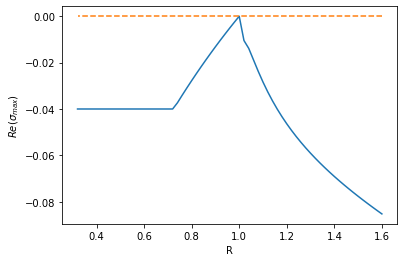

In [170]:
fig, ax = plt.subplots()
plot_max_eigenvalues(ax, model, R, "R")

The maximum real part of the eigenvalues reaches zero at $R=1$, thus bifurcation occurs at this point. 

## Stability With Diffusion

I numerically solved eigenvalues for $|I\sigma-J+Dk^2|=0$, the dipsersal relation, where $J$ is the Jacobian matrix of the system evaluated at the equilibrium, $D$ is the diffusion matrix containing the diffusion constants of the variables on the diagonals, and $k$ is the wavenumber.

I plotted the maximum real parts of the eigenvalues at a range of $k$ values at different $R$ levels. Diffusion-driven instability occurs at a particular $R$ value when any of the eigenvalue real parts become positive for any $k$ value. The $k$ value at which the maximum eigenvalue real part occurs is the characteristic spatial scale of the patterns.

In [171]:
k = np.arange(0.01, 0.5, 0.01)

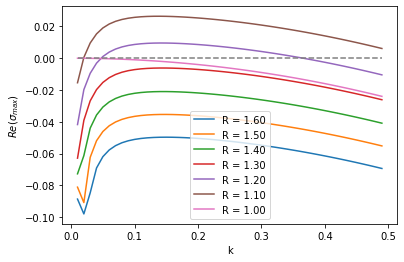

In [172]:
fig, ax = plt.subplots()
plot_max_eigenvalues(ax, model, np.arange(1.6, 1, -0.1), "R", k)

The maximum eigenvalue real parts increase as $R$ decreases, with the peak at $k\approx0.15$. Diffusion-driven instability occurs at $R$ between 1.3 and 1.2. Thus, pattern formation occurs between these rainfall values.

# Effects of Noise

## Additive Noise
I simulated the model at different levels of additive noise, where the noise does not depend on the variable values.

In [173]:
time_steps = 500
model.noise = "additive"
sigma = [0.01, 0.05, 0.25]

### $\sigma=0.01$

In [174]:
if not load:
    model.sigma = sigma[0]
    snapshots1 = parameter_change(model, R, "R", time_steps)

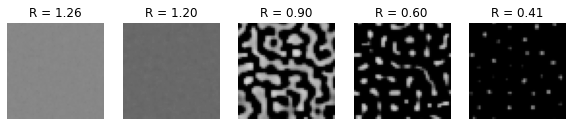

In [175]:
plot_snapshots(snapshots1, [1.26, 1.2, 0.9, 0.6, 0.41], "R", vmin=0, vmax=20, precision=2)

### $\sigma=0.05$

In [176]:
if not load:
    model.sigma = sigma[1]
    snapshots2 = parameter_change(model, R, "R", time_steps)

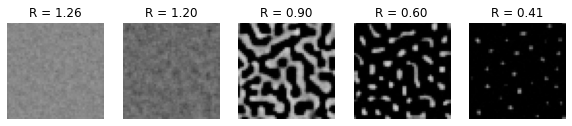

In [177]:
plot_snapshots(snapshots2, [1.26, 1.2, 0.9, 0.6, 0.41], "R", vmin=0, vmax=20, precision=2)

### $\sigma=0.25$

In [178]:
if not load:
    model.sigma = sigma[2]
    snapshots3 = parameter_change(model, R, "R", time_steps)

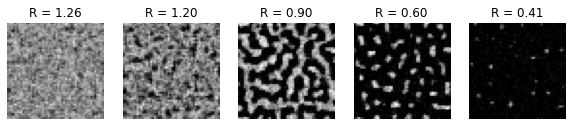

In [179]:
plot_snapshots(snapshots3, [1.26, 1.2, 0.9, 0.6, 0.41], "R", vmin=0, vmax=20, precision=2)

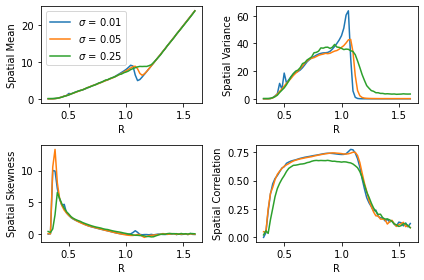

In [180]:
spatial_indicator_grid([snapshots1, snapshots2, snapshots3], "R", levels=sigma, level_name=r"$\sigma$")

At low levels of noise, the rainfall value $R$ needs to get close to the Turing instability point for pattern formation to start. We observe a sharp increase in the spatial mean at this point. The patterns in the snapshots crisper.

At higher levels of noise, pattern formation is induced by noise so that pattern onset begins earlier. We observe a smoother transition in the spatial mean instead of an abrupt jump. The patterns in the snapshots were fuzzier.

The other spatial indicators remained largely similarly for all noise levels.

## Multiplicative Noise

I simulated the model at different levels of multiplicative noise, where the noise depends linearly on the variable values.

In [181]:
model.noise = "multiplicative"
sigma = [0.01, 0.1, 0.3]

### $\sigma=0.01$

In [182]:
if not load:
    model.sigma = sigma[0]
    snapshots4 = parameter_change(model, R, "R", time_steps)

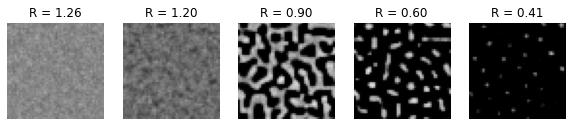

In [183]:
plot_snapshots(snapshots4, [1.26, 1.2, 0.9, 0.6, 0.41], "R", vmin=0, vmax=20, precision=2)

### $\sigma=0.1$

In [184]:
if not load:
    model.sigma = sigma[1]
    snapshots5 = parameter_change(model, R, "R", time_steps)

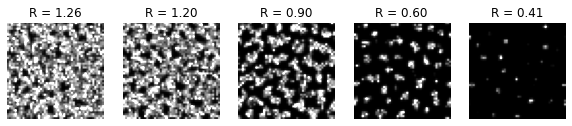

In [185]:
plot_snapshots(snapshots5, [1.26, 1.2, 0.9, 0.6, 0.41], "R", vmin=0, vmax=20, precision=2)

### $\sigma=0.3$

In [186]:
if not load:
    model.sigma = sigma[2]
    snapshots6 = parameter_change(model, R, "R", time_steps)

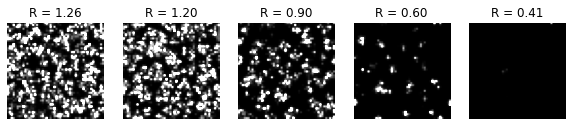

In [187]:
plot_snapshots(snapshots6, [1.26, 1.2, 0.9, 0.6, 0.41], "R", vmin=0, vmax=20, precision=2)

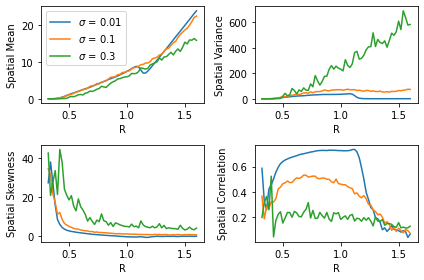

In [188]:
spatial_indicator_grid([snapshots4, snapshots5, snapshots6], "R", levels=sigma, level_name=r"$\sigma$")

Results are mostly similar to the additive noise.

However, at $\sigma=0.25$, this causes pattern formation to occur from the beginning. However, the patterns are not regular.

The spatial mean is lower compared to lower noise levels, probably because of lower efficiency due to noise interference.

The spatial variance starts very high and decreases as $R$ decreases. This is because the noise disrupted the spatial homogeneity.

The spatial skewness follows a similarly trend compared to lower noise levels, so can still be a fairly reliable indicator.

The spatial correlation is much lower and does not follow a clear trend, making it less reliable. This is likely due to the noise breaking down the pattern regularity.

## Change in Noise

### Additive Noise

I simulated the model near the Turing instability point while slowly increasing the additive noise level.

In [189]:
model.R = 1.2
model.noise = "additive"
noise = np.arange(0.01, 0.5, 0.01)

In [190]:
if not load:
    snapshots7 = parameter_change(model, noise, "sigma", time_steps=1000, warm_up=10000)

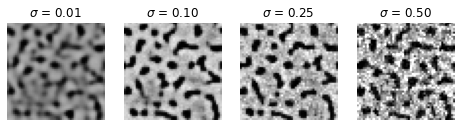

In [191]:
plot_snapshots(snapshots7, [0.01, 0.1, 0.25, 0.5], r"$\sigma$", vmin=0, vmax=20, precision=2)

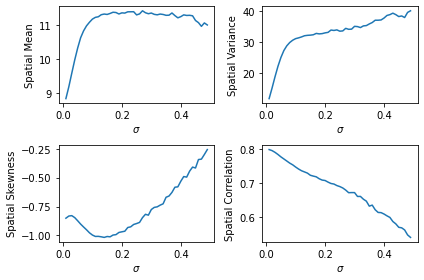

In [192]:
spatial_indicator_grid(snapshots7, r"$\sigma$")

As the noise level increases, the spatial mean decreases due to noise interference causing inefficiencies. Spatial variance increases due to larger fluctuations from noise. Spatial skewness increases. Spatial correlation decreases due to noise breaking down regularity of patterns.

### Multiplicative Noise

I simulated the model at the Turing instability point while slowly increasing the multiplicative noise level.

In [193]:
model.R = 1.2
model.noise = "multiplicative"
noise = np.arange(0.01, 0.25, 0.01)

In [194]:
if not load:
    snapshots8 = parameter_change(model, noise, "sigma", time_steps=1000, warm_up=10000)

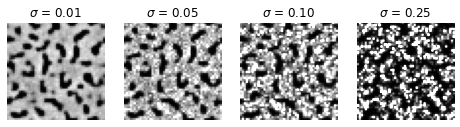

In [195]:
plot_snapshots(snapshots8, [0.01, 0.05, 0.1, 0.25], r"$\sigma$", vmin=0, vmax=20, precision=2)

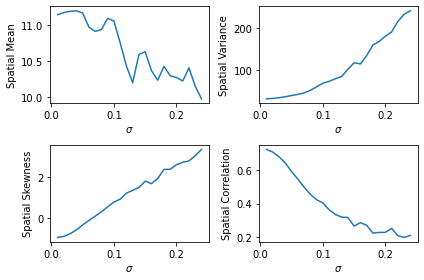

In [196]:
spatial_indicator_grid(snapshots8, r"$\sigma$")

Similar results to additive noise.

# Duration of Run

I simulated the model at the Turing instability point at different levels of noise for a large number of time steps.

In [197]:
model.R = 1.2
model.noise = "additive"
time_steps = 7500
sigma = [0.01, 0.1, 0.5]

## $\sigma=0.01$

In [198]:
if not load:
    model.sigma = sigma[0]
    snapshots9 = simulate_time_steps(model, time_steps, *model.initialisation())
    snapshots9 = snapshots9.iloc[::100]

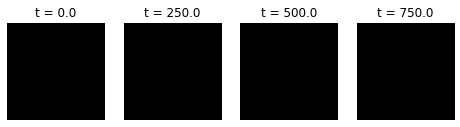

In [199]:
plot_snapshots(snapshots9, [0, 250, 500, 750], "t", vmin=0, vmax=20)

## $\sigma=0.1$

In [200]:
if not load:
    model.sigma = sigma[1]
    snapshots10 = simulate_time_steps(model, time_steps, *model.initialisation())
    snapshots10 = snapshots10.iloc[::100]

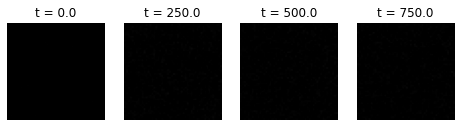

In [201]:
plot_snapshots(snapshots10, [0, 250, 500, 750], "t", vmin=0, vmax=20)

## $\sigma=0.5$

In [202]:
if not load:
    model.sigma = sigma[2]
    snapshots11 = simulate_time_steps(model, time_steps, *model.initialisation())
    snapshots11 = snapshots11.iloc[::100]

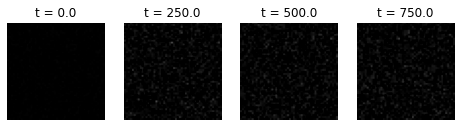

In [203]:
plot_snapshots(snapshots11, [0, 250, 500, 750], "t", vmin=0, vmax=20)

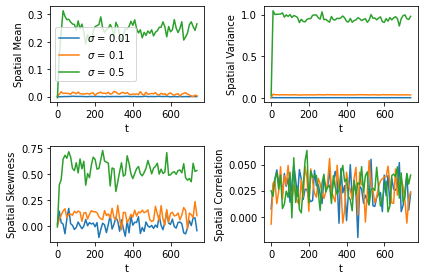

In [204]:
spatial_indicator_grid([snapshots9, snapshots10, snapshots11], "t", levels=sigma, level_name=r"$\sigma$")

When the level of noise is higher pattern formation occurs earlier. The spatial correlation is lower for higher levels of noise, due to noise breaking down regularity of patterns.

# Effect of Preventive Measures

I simulated the effect of reducing the mortality of plants when the rainfall falls below a certain value to see if it can prevent desertification. Mortality of plants can be due to natural mortality or grazing. Since there will always be natural mortality I assume a minimum plant mortality of 0.1.

In [205]:
model.noise = "additive"
model.sigma_B = 0.25

d0 = 0.25
dd = [0, -0.0001, -0.001, -0.01]
d_bounds = (0.1, None)

## $\frac{dR}{dt}=-0.001$

In [206]:
dR = -0.0001
time_steps = 1000

### Preventive Measues at $R=0.45$

In [207]:
R0 = 0.5

f = lambda t : R0 + t*dR/model.dt
g = lambda R : model.dt*(R - R0)/dR

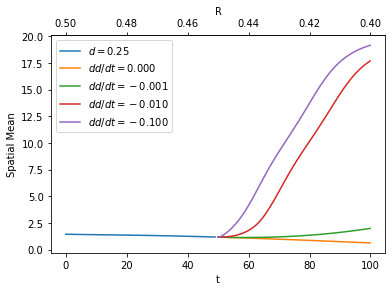

In [208]:
if not load:
    model.R = R0
    model.d = d0
    P, W, O = model.initialisation()
    P = snapshots1.iloc[np.argmin(np.abs(snapshots1.index - R0))]

    snapshots12 = preventive_measure(model, time_steps, R0, dR, d0, dd, "R", "d", 0.45, b_bounds=d_bounds, u=(P, W, O), warm_up=1000)
    snapshots12 = [snapshots.iloc[::10] for snapshots in snapshots12]

fig, ax = plt.subplots()

ax2 = ax.secondary_xaxis("top", functions=(f,g))
ax2.set_xlabel("R")

for snapshots in snapshots12:
    plot_spatial_indicator(ax, snapshots, "mean", "t")

ax.legend([r"$d=0.25$"] + [fr"$dd/dt={dd_step/model.dt:.3f}$" for dd_step in dd])

### Preventive Measures at $R=0.4$

In [209]:
R0 = 0.45

f = lambda t : R0 + t*dR/model.dt
g = lambda R : model.dt*(R - R0)/dR

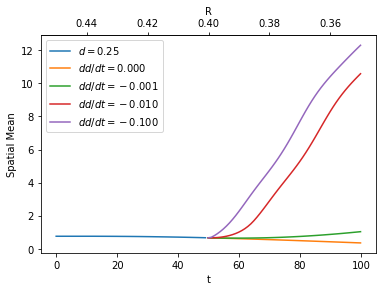

In [210]:
if not load:
    model.R = R0
    model.d = d0
    P, W, O = model.initialisation()
    P = snapshots1.iloc[np.argmin(np.abs(snapshots1.index - R0))]

    snapshots13 = preventive_measure(model, time_steps, R0, dR, d0, dd, "R", "d", 0.4, b_bounds=d_bounds, u=(P, W, O), warm_up=10000)
    snapshots13 = [snapshots.iloc[::10] for snapshots in snapshots13]

fig, ax = plt.subplots()

ax2 = ax.secondary_xaxis("top", functions=(f,g))
ax2.set_xlabel("R")

for snapshots in snapshots13:
    plot_spatial_indicator(ax, snapshots, "mean", "t")

ax.legend([r"$d=0.25$"] + [fr"$dd/dt={dd_step/model.dt:.3f}$" for dd_step in dd])

## $\frac{dR}{dt}=-0.01$

In [211]:
dR = -0.001
time_steps = 100

### Preventive Measures at $R=0.45$

In [212]:
R0 = 0.5

f = lambda t : R0 + t*dR/model.dt
g = lambda R : model.dt*(R - R0)/dR

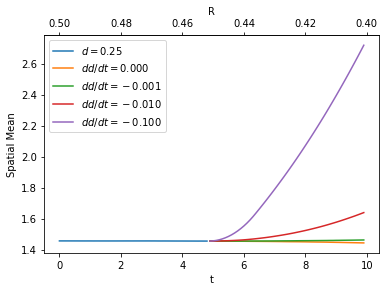

In [213]:
if not load:
    model.R = R0
    model.d = d0
    P, W, O = model.initialisation()
    P = snapshots1.iloc[np.argmin(np.abs(snapshots1.index - R0))]

    snapshots14 = preventive_measure(model, time_steps, R0, dR, d0, dd, "R", "d", 0.45, b_bounds=d_bounds, u=(P, W, O), warm_up=10000)

fig, ax = plt.subplots()

ax2 = ax.secondary_xaxis("top", functions=(f,g))
ax2.set_xlabel("R")

for snapshots in snapshots14:
    plot_spatial_indicator(ax, snapshots, "mean", "t")

ax.legend([r"$d=0.25$"] + [fr"$dd/dt={dd_step/model.dt:.3f}$" for dd_step in dd])

### Preventive measures at $R=0.4$

In [214]:
R0 = 0.45

f = lambda t : R0 + t*dR/model.dt
g = lambda R : model.dt*(R - R0)/dR

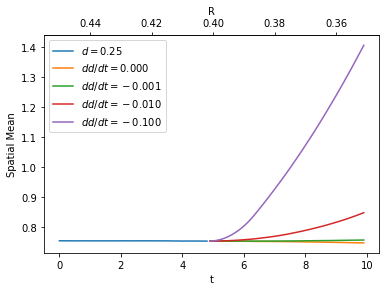

In [215]:
if not load:
    model.R = R0
    model.d = d0
    P, W, O = model.initialisation()
    P = snapshots1.iloc[np.argmin(np.abs(snapshots1.index - R0))]

    snapshots15 = preventive_measure(model, time_steps, R0, dR, d0, dd, "R", "d", 0.4, b_bounds=d_bounds, u=(P, W, O), warm_up=10000)

fig, ax = plt.subplots()

ax2 = ax.secondary_xaxis("top", functions=(f,g))
ax2.set_xlabel("R")

for snapshots in snapshots15:
    plot_spatial_indicator(ax, snapshots, "mean", "t")

ax.legend([r"$d=0.25$"] + [fr"$dd/dt={dd_step/model.dt:.3f}$" for dd_step in dd])

## Observations

When the reduction of plant mortality is fast enough to overcome the increasingly harsh environment from decreasing rainfall, then vegetation recovers in the system. However, if the reduction is insufficiently fast, then desertification continues.

When the decrease in rainfall is faster, then a faster reducation rate in plant mortality is required for the system to recover. The faster the reduction rate in plant mortality, the faster and sooner recovery occurs.

When the preventive measures take place closer to the deterministic bifurcation point of collapse, then the mortality needs to reduce more quickly as there is less time for recovery to occur.

# Spatial Spectral Properties

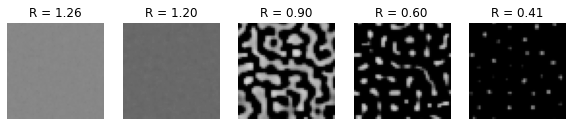

In [216]:
plot_snapshots(snapshots1, [1.26, 1.2, 0.9, 0.6, 0.41], "R", vmin=0, vmax=20, precision=2)

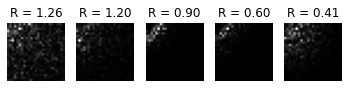

In [217]:
plot_power_spectra(snapshots1, [1.26, 1.2, 0.9, 0.6, 0.41], "R", precision=2)

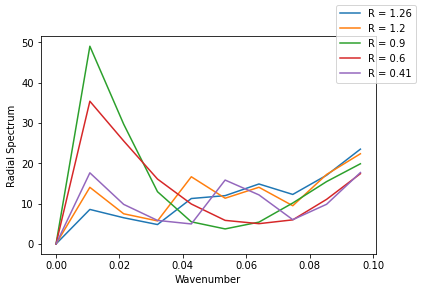

In [218]:
plot_radial_spectra(snapshots1, model.dx, [1.26, 1.2, 0.9, 0.6, 0.41], "R")

I plotted the power spectra and radial spectra of the snapshots at different rainfall values. The power spectra exhibited a ring when patterns were present in the snapshot; this is shown by the peaks in the radial spectra at a particular wavenumber.

# Homogeneous Equilibria

In [219]:
turing_instability = find_bifurcation(model, 1.5, 0.1, -0.1, "R", tol=0, k=k)

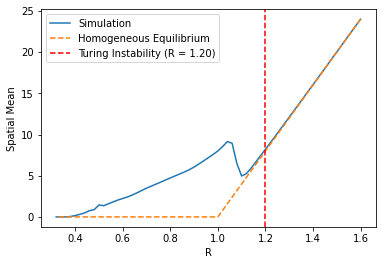

In [220]:
fig, ax = plt.subplots()
plot_spatial_indicator(ax, snapshots1, "mean", "R")
plot_equilibria(ax, model, R, "R")
ax.axvline(turing_instability, linestyle='--', color="red")
ax.legend(["Simulation", "Homogeneous Equilibrium", f"Turing Instability (R = {turing_instability:.2f})"])

I plotted the simulation results against the homogeneous equilibria. The simulation closely followed the homogeneous equilibrium before pattern formation occurs. Eventually the simulation reaches the bare state equilibrium at zero.

I also plotted the Turing instability point at $R=1.2$ and observe that pattern formation occurs shortly after.

# Save Simulation Snapshots

In [221]:
save = False  # set to True to save current simulation results

if save:
    data = (snapshots1, snapshots2, snapshots3, snapshots4, snapshots5, snapshots6, snapshots7, snapshots8, snapshots9, snapshots10, snapshots11, snapshots12, snapshots13, snapshots14, snapshots15)
    save_data('Results/scale_dependent_model.dat', data)